
Global economy indicators:
https://www.kaggle.com/datasets/prasad22/global-economy-indicators



# **Columns:**

- **CountryID**: Unique numerical ID assigned to each country.  
- **Country**: Name of the country.  
- **Year**: Year of the record (1970–2021 typically).  
- **AMA exchange rate**: Alternative Market Arrangement exchange rate.  
- **IMF based exchange rate**: Exchange rate based on IMF data.  
- **Population**: Total population of the country for that year.  
- **Currency**: Currency used by the country (e.g., USD, Yen, Euro).  
- **Per capita GNI**: Gross National Income per person (in current USD).  
- **Agriculture, hunting, forestry, fishing (ISIC A-B)**: Total value of output from agricultural sectors (primary industries).  
- **Changes in inventories**: Value of changes in stockpiled goods (inventories) for a given year.  
- **Construction (ISIC F)**: Value added from construction activities (e.g., buildings, infrastructure).  
- **Exports of goods and services**: Total value of goods and services exported by the country.  
- **Final consumption expenditure**: Total spending on goods and services by households, non-profits, and governments.  
- **General government final consumption expenditure**: Government spending on goods and services (excluding transfer payments).  
- **Gross capital formation**: Total investment in assets like buildings, machinery, and inventories (gross investment).  
- **Gross fixed capital formation (including Acquisitions less disposals of valuables)**: Investment in fixed assets like factories, equipment, and property.  
- **Household consumption expenditure (including Non-profit institutions serving households)**: Spending by households and non-profits on goods and services.  
- **Imports of goods and services**: Total value of goods and services imported into the country.  
- **Manufacturing (ISIC D)**: Value added from manufacturing activities (e.g., factories producing goods).  
- **Mining, Manufacturing, Utilities (ISIC C-E)**: Combined value from mining, manufacturing, and utilities industries.  
- **Other Activities (ISIC J-P)**: Value added from other service sectors (e.g., education, health, finance, real estate).  
- **Total Value Added**: Sum of all sector outputs before adding taxes or subtracting subsidies on products.  
- **Transport, storage and communication (ISIC I)**: Value added from transportation, logistics, warehousing, postal services, telecommunications.  
- **Wholesale, retail trade, restaurants and hotels (ISIC G-H)**: Value from trade, hospitality, and food service industries.  
- **Gross National Income (GNI) in USD**: Total income earned by a country's residents and businesses (including foreign income).  
- **Gross Domestic Product (GDP)**: Total market value of all final goods and services produced within a country in a given year (without considering foreign income).  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


Read Data set:

In [ ]:
df = pd.read_csv("drive/My Drive/Indicators.csv") #rename file to Indicators

In [ ]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  #remove white space from all strings in rows
print(df.columns.tolist())


['CountryID', 'Country', 'Year', 'AMA exchange rate', 'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI', 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Changes in inventories', 'Construction (ISIC F)', 'Exports of goods and services', 'Final consumption expenditure', 'General government final consumption expenditure', 'Gross capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Household consumption expenditure (including Non-profit institutions serving households)', 'Imports of goods and services', 'Manufacturing (ISIC D)', 'Mining, Manufacturing, Utilities (ISIC C-E)', 'Other Activities (ISIC J-P)', 'Total Value Added', 'Transport, storage and communication (ISIC I)', 'Wholesale, retail trade, restaurants and hotels (ISIC G-H)', 'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)']


<ipython-input-104-093d3104970b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  #remove white space from all strings in rows


In [ ]:
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


# **Research Question #1**

**How has GDP per capita changed over time for the United States, China, Germany, & Japan?** ​


To do this we take a look at the following columns:
* **Country**: USA, China, Germany, Japan
* **Year**: See change over time
* **GDP Per capita**: Represent the Gross Domestic income per capita. = GDP / Population
* **GDP Per capita Growth Rate**: Represents the GDP growth rate %


To take a look at list of countries uncomment code box

In [ ]:
#list of all countries

# unique_countries = df['Country'].unique()
# unique_countries

Select the countries we want to look at:

In [ ]:
countries = ['United States', 'Germany', "Japan", "China"]
df_filtered = df[df['Country'].isin(['United States', 'Germany', 'Japan', 'China'])].copy()
df_filtered


,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
1948,156,China,1970,2.461809,2.461809,822534450,Yuan Renminbi,113,3.251267e+10,8.083485e+09,...,4.902085e+10,2.611805e+09,NaN,3.397095e+10,1.090661e+10,9.259856e+10,4.070177e+09,7.705714e+09,9.260262e+10,9.260262e+10
1949,156,China,1971,2.461809,2.461809,843285424,Yuan Renminbi,118,3.386533e+10,8.774034e+09,...,5.126311e+10,2.633690e+09,NaN,3.803300e+10,1.182870e+10,9.980058e+10,4.403265e+09,7.746335e+09,9.980058e+10,9.980058e+10
1950,156,China,1972,2.245067,2.245067,862840403,Yuan Renminbi,132,3.718375e+10,7.527615e+09,...,5.942807e+10,3.516407e+09,NaN,4.454656e+10,1.302411e+10,1.140000e+11,5.478678e+09,9.233578e+09,1.140000e+11,1.140000e+11
1951,156,China,1973,1.989416,1.989416,881652080,Yuan Renminbi,157,4.602356e+10,1.201358e+10,...,7.200606e+10,6.156096e+09,NaN,5.443306e+10,1.513510e+10,1.390000e+11,6.584847e+09,1.128975e+10,1.390000e+11,1.390000e+11
1952,156,China,1974,1.961200,1.961200,899367640,Yuan Renminbi,160,4.862329e+10,9.585968e+09,...,7.480114e+10,8.703400e+09,NaN,5.580257e+10,1.616867e+10,1.440000e+11,6.740771e+09,1.129920e+10,1.440000e+11,1.440000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10140,840,United States,2017,1.000000,1.000000,329791231,US Dollar,60297,1.750000e+11,3.219000e+10,...,1.320000e+13,2.920000e+12,2.200000e+12,2.840000e+12,1.080000e+13,1.950000e+13,2.000000e+12,2.860000e+12,1.990000e+13,1.950000e+13
10141,840,United States,2018,1.000000,1.000000,332140037,US Dollar,63038,1.740000e+11,5.908900e+10,...,1.390000e+13,3.130000e+12,2.340000e+12,3.030000e+12,1.140000e+13,2.050000e+13,2.130000e+12,2.980000e+12,2.090000e+13,2.050000e+13
10142,840,United States,2019,1.000000,1.000000,334319671,US Dollar,65101,1.600000e+11,7.278900e+10,...,1.440000e+13,3.120000e+12,2.370000e+12,3.060000e+12,1.190000e+13,2.140000e+13,2.250000e+12,3.120000e+12,2.180000e+13,2.140000e+13
10143,840,United States,2020,1.000000,1.000000,335942003,US Dollar,63917,1.620000e+11,-5.582200e+10,...,1.410000e+13,2.780000e+12,2.240000e+12,2.840000e+12,1.200000e+13,2.110000e+13,2.220000e+12,2.990000e+12,2.150000e+13,2.110000e+13


1. Add gdp per capita calculated by gdp / population
2. GDP per capita growth = country / gdp per capita into percent

In [ ]:
df_filtered['GDP per capita'] = df_filtered['Gross Domestic Product (GDP)'] / df_filtered['Population']
df_filtered['GDP per capita growth'] = df_filtered.groupby('Country')['GDP per capita'].pct_change() * 100
# df_filtered

Check if they all start from the same year:

In [ ]:
start_years = df_filtered.groupby('Country')['Year'].min().reset_index()
start_years.columns = ['Country', 'Start Year']
start_years

,Country,Start Year
0,China,1970
1,Germany,1970
2,Japan,1970
3,United States,1970


Let's plot the selected countries and see how their GDP grows

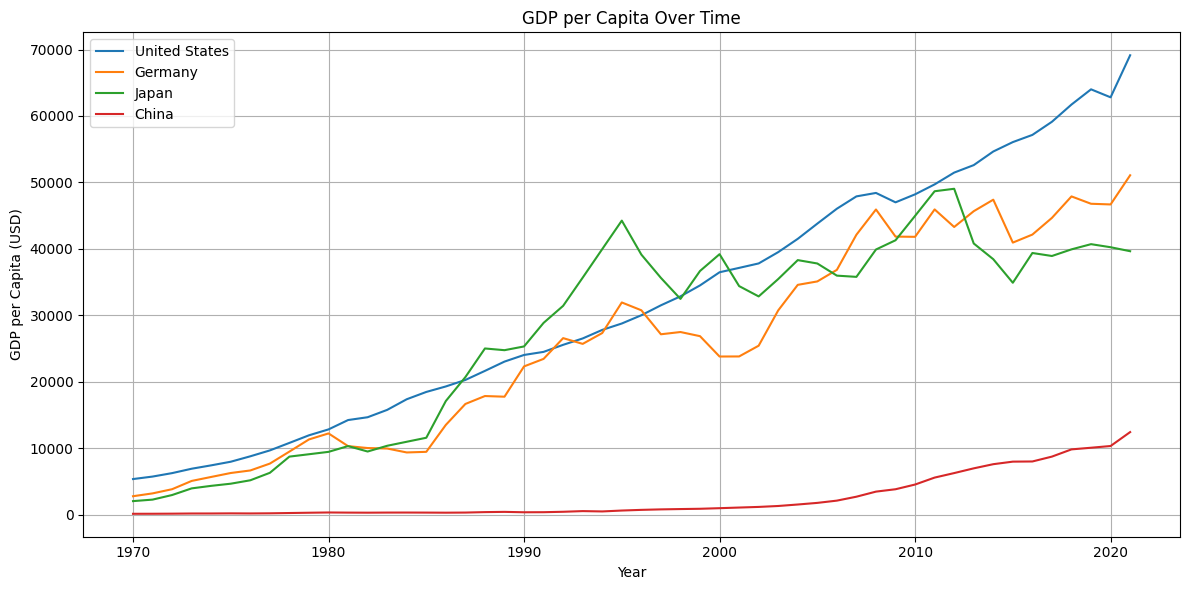

In [ ]:
plt.figure(figsize=(12, 6))


#Plot GDP per capita for each country
for country in countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP per capita'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.title('GDP per Capita Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let's create a table to see the comparison between GDP per capita over a decade between selected countries

In [ ]:
#new Decade column
df_filtered['Decade'] = (df_filtered['Year'] // 10) * 10

#calculate average GDP per capita every decade
gdp_by_decade = df_filtered.groupby(['Decade', 'Country'])['GDP per capita'].mean().reset_index()

gdp_decade_table = gdp_by_decade.pivot(index='Decade', columns='Country', values='GDP per capita')

gdp_decade_table


Country,China,Germany,Japan,United States
Decade,,,,
1970,171.223206,6182.261550,4934.839703,8068.876015
1980,311.695479,12697.274276,14962.163567,17745.784137
1990,587.388239,26944.843584,34933.420012,28596.479291
2000,1975.170385,34013.393418,37089.961767,42555.570546
2010,7539.851894,44651.393503,41572.354719,55471.307704
2020,11364.783712,48878.166228,39942.043803,65974.206883


Now we plot the data of the Annual GDP Per Capita Growth Rate, from 1971 (since the prior year is used to track percentages)
* **GDP per Capita Growth Rate (%**):	How the average income per person changes from year to year

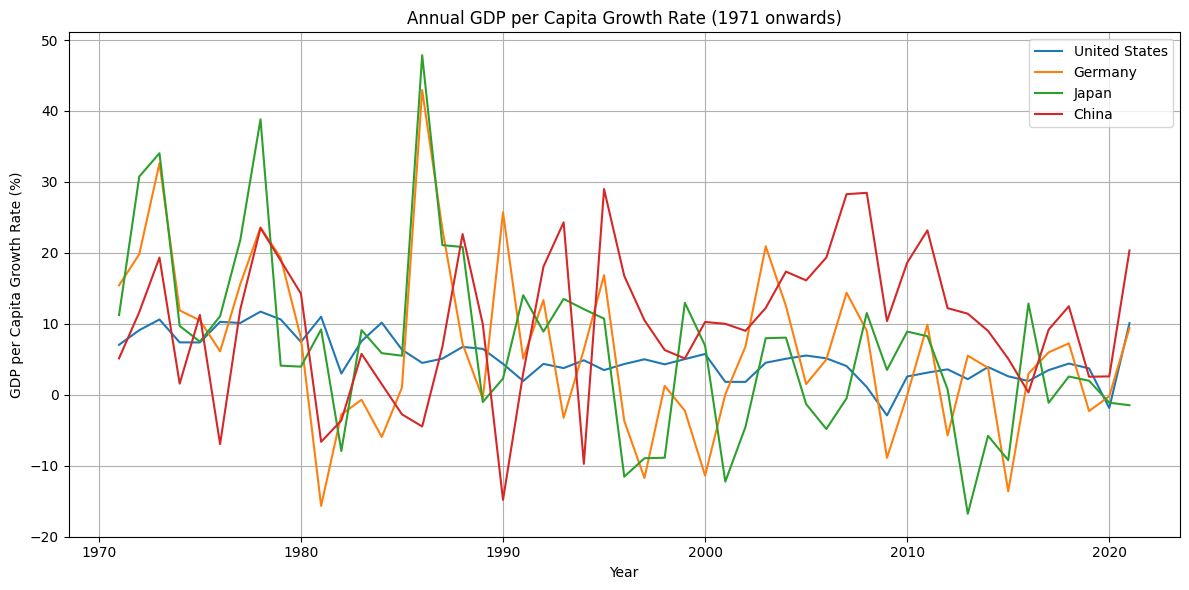

In [ ]:

plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP per capita growth'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP per Capita Growth Rate (%)')
plt.title('Annual GDP per Capita Growth Rate (1971 onwards)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Now we want to smooth our plot to get a more accurate reading, since we can see there is a large difference in growth rate.

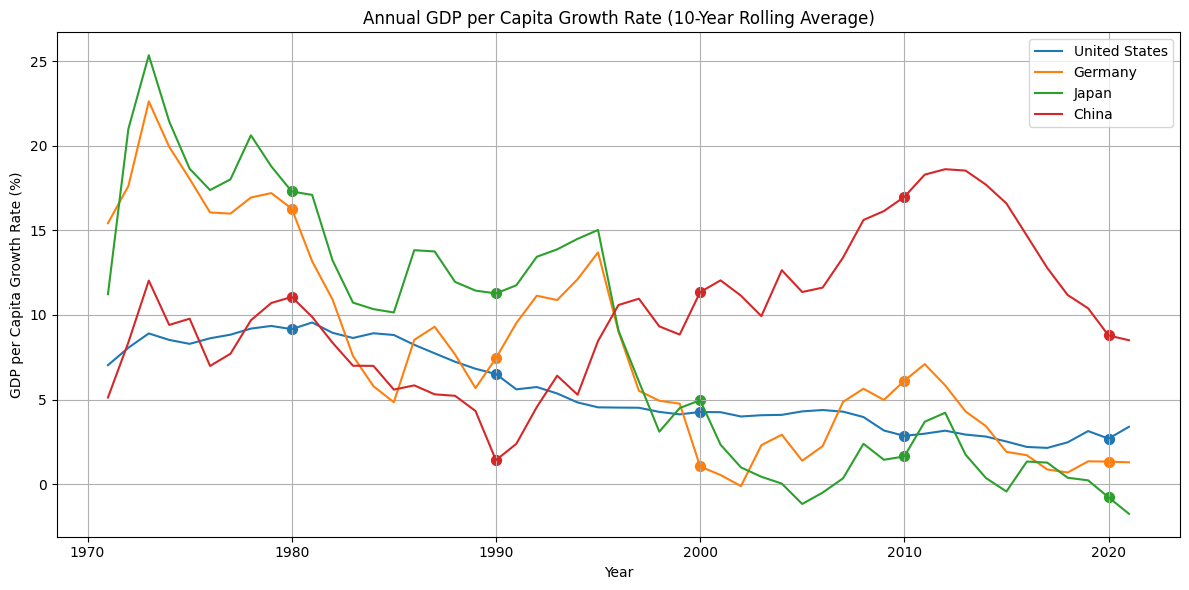

In [ ]:
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['Country'] == country].sort_values('Year')


    smoothed_growth = country_data['GDP per capita growth'].rolling(10, min_periods=1).mean()

    plt.plot(country_data['Year'], smoothed_growth, label=country)

    #markers every 10 years
    decade_mask = country_data['Year'] % 10 == 0
    plt.scatter(
        country_data['Year'][decade_mask],
        smoothed_growth[decade_mask],
        s=50,  # size of the marker
        marker='o'
    )

plt.xlabel('Year')
plt.ylabel('GDP per Capita Growth Rate (%)')
plt.title('Annual GDP per Capita Growth Rate (10-Year Rolling Average)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Decade summary table:  <br/>
Comparison for the annual GDP growth rate per decade: <br/>
Average GDP per Capita Growth Rate by Decade (%)
This table summarizes the average growth rate per decade. It provides a clearer comparison of performance across countries and decade

In [ ]:
#calculate the mean GDP per capita growth
growth_by_decade = df_filtered.groupby(['Decade', 'Country'])['GDP per capita growth'].mean().reset_index()

#decade as rows, country as columns
growth_decade_table = growth_by_decade.pivot(index='Decade', columns='Country', values='GDP per capita growth')

growth_decade_table = growth_decade_table.round(2)

growth_decade_table


Country,China,Germany,Japan,United States
Decade,,,,
1970,10.71,17.20,18.78,9.35
1980,4.33,5.68,11.44,6.82
1990,8.84,4.76,4.50,4.13
2000,16.14,4.98,1.45,3.18
2010,10.39,1.35,0.23,3.14
2020,11.45,4.60,-1.31,4.10


# **Research Question #2**

**Which sectors show the strongest and weakest correlations with GDP globally? ​**


First we will select only the selector columns + GDP for correlation and store them in a dataframe:

In [ ]:
sector_columns = [
    'Agriculture, hunting, forestry, fishing (ISIC A-B)',
    'Construction (ISIC F)',
    'Manufacturing (ISIC D)',
    'Mining, Manufacturing, Utilities (ISIC C-E)',
    'Other Activities (ISIC J-P)',
    # 'Total Value Added',
    'Transport, storage and communication (ISIC I)',
    'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
    'Gross Domestic Product (GDP)'  # For correlation, not a sector
]

#store in sectors_df
sectors_df = df_filtered[sector_columns]
# sectors_df
sectors_df = sectors_df.dropna()
sectors_df

,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross Domestic Product (GDP)
1982,2.590000e+11,1.050000e+11,6.250000e+11,7.880000e+11,4.220000e+11,1.640000e+11,1.950000e+11,1.960000e+12
1983,2.740000e+11,1.270000e+11,7.340000e+11,9.420000e+11,5.030000e+11,1.900000e+11,2.220000e+11,2.290000e+12
1984,3.020000e+11,1.560000e+11,8.930000e+11,1.150000e+12,6.190000e+11,2.240000e+11,2.670000e+11,2.750000e+12
1985,3.760000e+11,2.010000e+11,1.150000e+12,1.450000e+12,8.350000e+11,2.800000e+11,3.480000e+11,3.550000e+12
1986,4.850000e+11,2.700000e+11,1.480000e+12,1.870000e+12,1.000000e+12,3.490000e+11,4.720000e+11,4.590000e+12
...,...,...,...,...,...,...,...,...
10140,1.750000e+11,8.010000e+11,2.200000e+12,2.840000e+12,1.080000e+13,2.000000e+12,2.860000e+12,1.950000e+13
10141,1.740000e+11,8.470000e+11,2.340000e+12,3.030000e+12,1.140000e+13,2.130000e+12,2.980000e+12,2.050000e+13
10142,1.600000e+11,9.040000e+11,2.370000e+12,3.060000e+12,1.190000e+13,2.250000e+12,3.120000e+12,2.140000e+13
10143,1.620000e+11,8.940000e+11,2.240000e+12,2.840000e+12,1.200000e+13,2.220000e+12,2.990000e+12,2.110000e+13


Calculate the correlation matrix:

In [ ]:
sector_corr = sectors_df.corr()
# sector_corr

Select only the GDP column from the full correlation matrix & drop GDP itself. This yields us the **correlations of sectors vs GDP** for overall countries (global correlation).

In [ ]:
#corr of sectors with GDP only
sector_to_gdp_corr = sector_corr['Gross Domestic Product (GDP)'].drop('Gross Domestic Product (GDP)')

#Sort from strongest to weakest
sector_to_gdp_corr = sector_to_gdp_corr.sort_values(ascending=False)

sector_to_gdp_corr


,Gross Domestic Product (GDP)
"Transport, storage and communication (ISIC I)",0.987330
"Wholesale, retail trade, restaurants and hotels (ISIC G-H)",0.986266
Other Activities (ISIC J-P),0.973266
Construction (ISIC F),0.928643
"Mining, Manufacturing, Utilities (ISIC C-E)",0.870231
Manufacturing (ISIC D),0.839756
"Agriculture, hunting, forestry, fishing (ISIC A-B)",0.482881


Now we plot this table into a heatmap:

<Axes: >

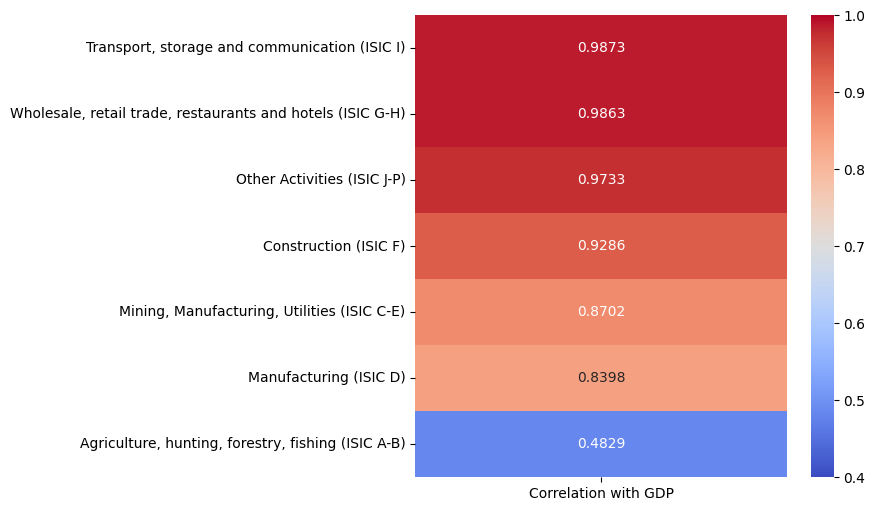

In [ ]:
plt.figure(figsize=(6, 6))

sector_to_gdp_corr_df = sector_to_gdp_corr.to_frame(name='Correlation with GDP')

#plot
from matplotlib import colors
norm = colors.Normalize(vmin=0.4, vmax=1.0)
sns.heatmap(
    sector_to_gdp_corr_df,
    annot=True,
    cmap='coolwarm',  #color
    norm=norm,
    fmt=".4f"
)


We see that "transportation, storage, and communication" and "wholesale, retail trade, restaurants and hotels" have the highest correlation while agriculture, hunting, forestry, and fishing has the weakest correlation with GDP.

# **Research Question #3**

**​How well can we predict a country's GDP growth rate based on its sectoral economic contributions?**

To do this we will look at
* Sectors dataframe: (training data)
* GDP (Target Data)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


GDP Growth Rate (%) --> Total economy  of country

In [ ]:
df_filtered['GDP Growth Rate (%)'] = df_filtered.groupby('Country')['Gross Domestic Product (GDP)'].pct_change() * 100

In [ ]:
# Sector columns (excluding GDP itself)
sector_features = [
    'Agriculture, hunting, forestry, fishing (ISIC A-B)',
    'Construction (ISIC F)',
    'Manufacturing (ISIC D)',
    'Mining, Manufacturing, Utilities (ISIC C-E)',
    'Other Activities (ISIC J-P)',
    'Transport, storage and communication (ISIC I)',
    'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
]


In [ ]:
columns_to_check = sector_features + ['GDP Growth Rate (%)']
df_filtered = df_filtered.dropna(subset=columns_to_check)

1. Loop through each country for the features and target and start train test
2. Model training & prediction
3. Save results in loop and put into a dataframe

* Set X as sector values (features) <br/>
&
* Set Y as GDP Growth rate (target)

In [ ]:
#empty list
results_list = []

#loop through each country
for country in countries:
    df_country = df_filtered[df_filtered['Country'] == country].copy()

    X = df_country[sector_features]
    y = df_country['GDP Growth Rate (%)']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Training
    model = LinearRegression()
    model.fit(X_train, y_train)

#Predict & evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    #Save to list
    results_list.append({
        'Country': country,
        'R2_Score': r2,
        'RMSE': rmse
    })

#save list into Df
results_df = pd.DataFrame(results_list)

results_df


,Country,R2_Score,RMSE
0,United States,0.569133,1.702195
1,Germany,-1.346567,11.436310
2,Japan,-0.008846,9.204502
3,China,-3.913917,6.246910


* United States (R² = 0.57), explaining approximately 57% of the variance in growth rates.

* However, the predictive performance was poor for Germany (R² = -1.35), Japan (R² = -0.01), and China (R² = -3.91), suggesting that in these cases, GDP growth is influenced by additional factors not captured by sector activity alone.

**Now let's predict actual GDP value:**
* Set X as sector values (features) <br/>
&
* Set Y as GDP (target)

In [ ]:
#empty list
results_list = []

#loop through each country
for country in countries:
    df_country = df_filtered[df_filtered['Country'] == country].copy()

    X = df_country[sector_features]
    y = np.log(df_country['Gross Domestic Product (GDP)'])


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Training
    model = LinearRegression()
    model.fit(X_train, y_train)


#Predict & evaluate
    y_pred_log = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_log)      # All in log scale
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))


    #Save to list
    results_list.append({
        'Country': country,
        'R2_Score': r2,
        'RMSE': rmse
    })


#save list into Df
results_df = pd.DataFrame(results_list)

results_df


,Country,R2_Score,RMSE
0,United States,0.961829,0.145809
1,Germany,0.892217,0.231302
2,Japan,0.946005,0.180436
3,China,0.829485,0.247254


For actual GDP value our predictions are very good now let's plot it:

In [ ]:
results_list

[{'Country': 'United States',
  'R2_Score': 0.961828689790947,
  'RMSE': np.float64(0.1458085051600693)},
 {'Country': 'Germany',
  'R2_Score': 0.892216969443416,
  'RMSE': np.float64(0.23130225514628924)},
 {'Country': 'Japan',
  'R2_Score': 0.9460045307508961,
  'RMSE': np.float64(0.18043586424864902)},
 {'Country': 'China',
  'R2_Score': 0.8294854250179591,
  'RMSE': np.float64(0.24725438314637796)}]

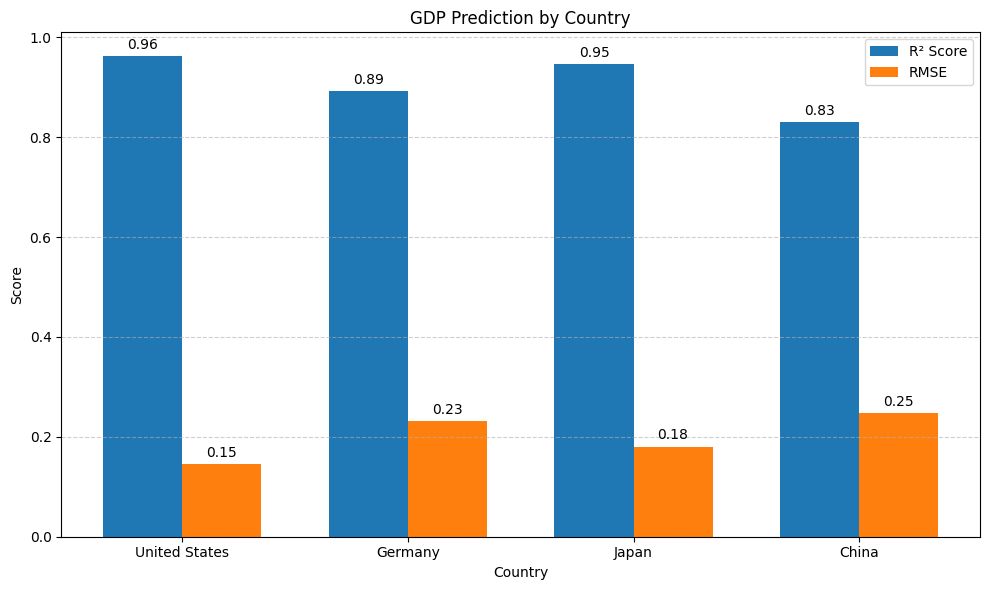

In [ ]:
countries = [d['Country'] for d in results_list]
r2_scores = [d['R2_Score'] for d in results_list]
rmses = [d['RMSE'] for d in results_list]


#plot
fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(countries))
width = 0.35

bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score')
bars2 = ax1.bar(x + width/2, rmses, width, label='RMSE')

ax1.set_xlabel('Country')
ax1.set_ylabel('Score')
ax1.set_title('GDP Prediction by Country')
ax1.set_xticks(x)
ax1.set_xticklabels(countries)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.6)

#Show values on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Research Question No.4**

**Can we cluster countries into groups based on similarities in their sectoral economic contributions?**

Fist let's create country average sector contributions:
* group each country in dataset, and calculate its sector contribution mean
* Drop nans


In [ ]:
country_sector_avg = df_filtered.groupby('Country')[sector_features].mean()
country_sector_avg = country_sector_avg.dropna()

country_sector_avg

,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)"
Country,,,,,,,
China,7.616667e+11,5.989444e+11,2.548444e+12,3.067222e+12,2.689944e+12,6.428889e+11,9.753333e+11
Germany,2.137953e+10,1.002842e+11,4.510908e+11,5.160104e+11,8.993932e+11,1.620373e+11,2.297055e+11
Japan,5.446223e+10,2.186059e+11,7.810991e+11,8.874177e+11,1.417189e+12,3.310414e+11,5.560769e+11
United States,1.062478e+11,3.932555e+11,1.291020e+12,1.645353e+12,4.995412e+12,9.219608e+11,1.417000e+12


Use standardScaler:
* Each sector feature will have a mean of 0 and std deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_sector_avg)
X_scaled_df = pd.DataFrame(X_scaled, index=country_sector_avg.index, columns=sector_features)
X_scaled_df

,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)"
Country,,,,,,,
China,1.723514,1.441820,1.605538,1.574572,0.119839,0.440176,0.405294
Germany,-0.703399,-1.209554,-1.024137,-1.036929,-1.012742,-1.208174,-1.266117
Japan,-0.594943,-0.580438,-0.610371,-0.656745,-0.685219,-0.628831,-0.534518
United States,-0.425172,0.348173,0.028971,0.119102,1.578121,1.396829,1.395341


From this table we see:
* China scores high acorss almost all sectors
* Germany scores low across almost all sectors
* Japan mostly negative
* USA low on some sectors high on other sectors

Let make an elbow plot to help us determine # of clusters:

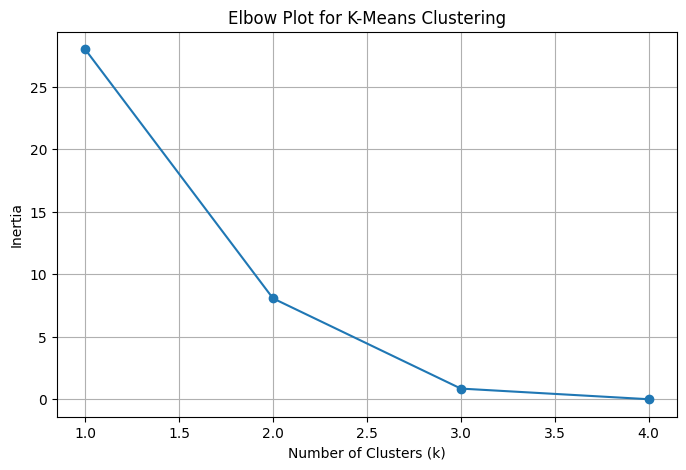

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The elbow happens around 2 clusters so set clusters to 2:

K-Means Clustering:

In [ ]:
from sklearn.cluster import KMeans

# KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
country_sector_avg['Cluster'] = kmeans.fit_predict(X_scaled)

country_sector_avg[['Cluster']]

,Cluster
Country,
China,1
Germany,0
Japan,0
United States,1


Calculating Cluster Average
* cluster 0: Mid size or developing economies includes small GDP countries
* cluster 1: Large/Advanced economies includes the usa & china

In [ ]:
#drop 'Cluster' temporarily if it's already in features
cluster_features = [c for c in sector_features]

cluster_profiles = country_sector_avg.groupby('Cluster')[cluster_features].mean() #group by cluster and calculate mean sector contribution


cluster_profiles


,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)"
Cluster,,,,,,,
0,3.792088e+10,1.594451e+11,6.160950e+11,7.017140e+11,1.158291e+12,2.465393e+11,3.928912e+11
1,4.339572e+11,4.961000e+11,1.919732e+12,2.356288e+12,3.842678e+12,7.824248e+11,1.196167e+12


In [ ]:
cluster_labels = {
    0: 'Mid-size / Developing Economies',
    1: 'Large / Advanced Economies'
}

#map cluster numbers to labels
country_sector_avg['Cluster_Label'] = country_sector_avg['Cluster'].map(cluster_labels)


country_sector_avg[['Cluster', 'Cluster_Label']]


,Cluster,Cluster_Label
Country,,
China,1,Large / Advanced Economies
Germany,0,Mid-size / Developing Economies
Japan,0,Mid-size / Developing Economies
United States,1,Large / Advanced Economies


Plotting sector averages per cluster:

1e12 = 1,000,000,000,000 (1 trillion)


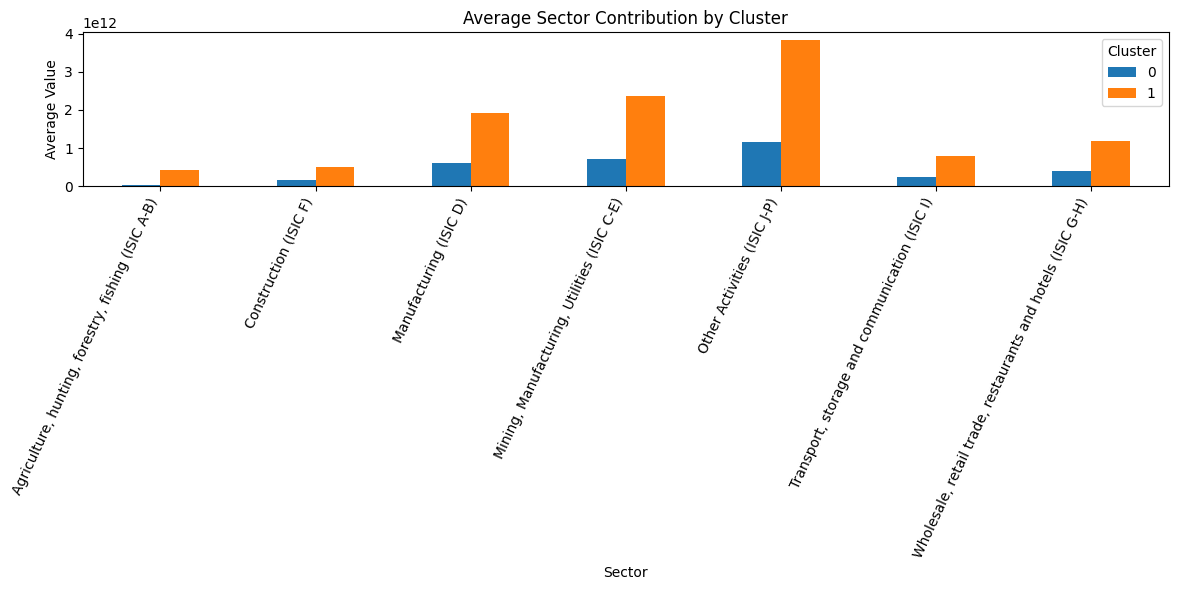

In [ ]:

cluster_profiles.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Sector Contribution by Cluster')
plt.xlabel('Sector')
plt.ylabel('Average Value')
plt.legend(title='Cluster')
plt.xticks(rotation=65, ha = 'right')
plt.tight_layout()
plt.show()
